In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [7]:
(training_images_data, training_labels_data), (testing_images_data, testing_labels_data) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 5510s 32us/step


In [8]:
training_images_data, testing_images_data = training_images_data / 255.0, testing_images_data / 255.0

In [9]:
names_classes = ['airplane', 'vehicles', 'birds', 'animal-cats', 'animal-deer',
               'animal-dog', 'animal-frog', 'animal-horse', 'ship', 'vehicles-truck']

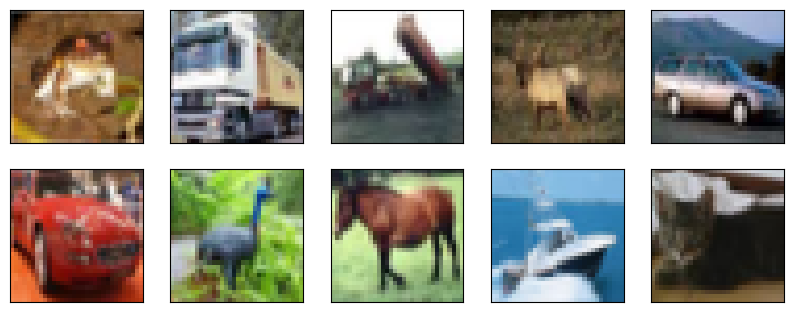

In [10]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_images_data[i], cmap=plt.cm.binary)

In [11]:
CNN_model = models.Sequential()
CNN_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
CNN_model.add(layers.MaxPooling2D((2, 2)))
CNN_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNN_model.add(layers.MaxPooling2D((2, 2)))
CNN_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [12]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [13]:
CNN_model.add(layers.Flatten())
CNN_model.add(layers.Dense(64, activation='relu'))
CNN_model.add(layers.Dense(10))
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [14]:
CNN_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_model = CNN_model.fit(training_images_data, training_labels_data, epochs=10, 
                    validation_data=(testing_images_data, testing_labels_data))

Epoch 1/10
1563/1563 [==============================] - 46s 27ms/step - loss: 1.5293 - accuracy: 0.4408 - val_loss: 1.2663 - val_accuracy: 0.5397
Epoch 2/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.1589 - accuracy: 0.5888 - val_loss: 1.0689 - val_accuracy: 0.6187
Epoch 3/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.0200 - accuracy: 0.6414 - val_loss: 1.0025 - val_accuracy: 0.6464
Epoch 4/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.9260 - accuracy: 0.6748 - val_loss: 1.0758 - val_accuracy: 0.6298
Epoch 5/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8601 - accuracy: 0.6973 - val_loss: 1.0191 - val_accuracy: 0.6450
Epoch 6/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8076 - accuracy: 0.7169 - val_loss: 0.8857 - val_accuracy: 0.6947
Epoch 7/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7632 - accuracy: 0.7323 - val_loss: 0.8778 -

313/313 [==============================] - 3s 8ms/step - loss: 0.9419 - accuracy: 0.6941


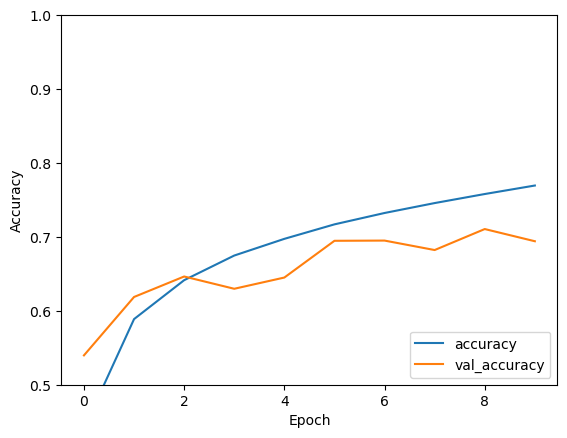

In [15]:
plt.plot(history_model.history['accuracy'], label='accuracy')
plt.plot(history_model.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

testing_loss, testing_acc = CNN_model.evaluate(testing_images_data,  testing_labels_data)